In [1]:
import numpy as np
import skimage.io as io
from skimage.color import rgb2gray
from skimage.transform import hough_line, hough_line_peaks, rotate
from skimage.feature import canny
from skimage import data
from skimage.filters import threshold_otsu

In [2]:
def get_max_freq(list):
    freq = {} 
    for item in list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    wanted_value=0
    wanted_angle=0
    for key, value in freq.items():
        if wanted_value<value:
            wanted_value=value
            wanted_angle=key       
    return wanted_angle       

In [7]:
def deskew(bw_image):
    tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
    h, theta, d = hough_line(bw_image, theta=tested_angles)
#     for i in range(h.shape[0]):
#         print ('h: ',h[i][250])
#     print('theta:',theta)
#     print('d:',h.shape)
    io.imshow(bw_image)
    origin = np.array((0, bw_image.shape[1]))
    angles=[]
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
        angles.append(angle)
#         print('dist:',dist)
#         print('angle:',angle* 180 / np.pi)
    angles = [angle * 180 / np.pi for angle in angles]
#     rotating_angle=np.max(angles)
    rotating_angle=get_max_freq(angles)
    
#     print(rotating_angle)
    if rotating_angle>0:
        rotated_image=rotate(bw_image,rotating_angle-90,resize=False)
    else:
        rotated_image=rotate(bw_image,rotating_angle+90,resize=False)
#     io.imshow(rotated_image) 
#     io.show()
    return rotated_image

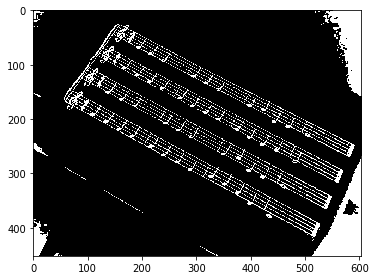

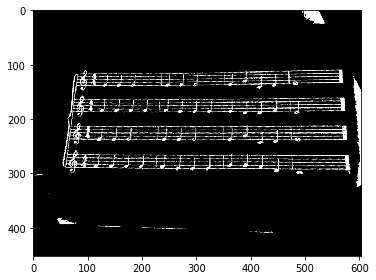

In [8]:
image=io.imread('rotated.jpg')
gray_image=rgb2gray(image)
threshold=threshold_otsu(gray_image)
bw_image=gray_image <=threshold
io.imshow(bw_image)
io.show()
rotated_image=deskew(bw_image)
io.imshow(rotated_image)
io.show()